In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("students.csv")
print("Shape is: ", df.shape)

Shape is:  (10000, 15)


In [209]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [210]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

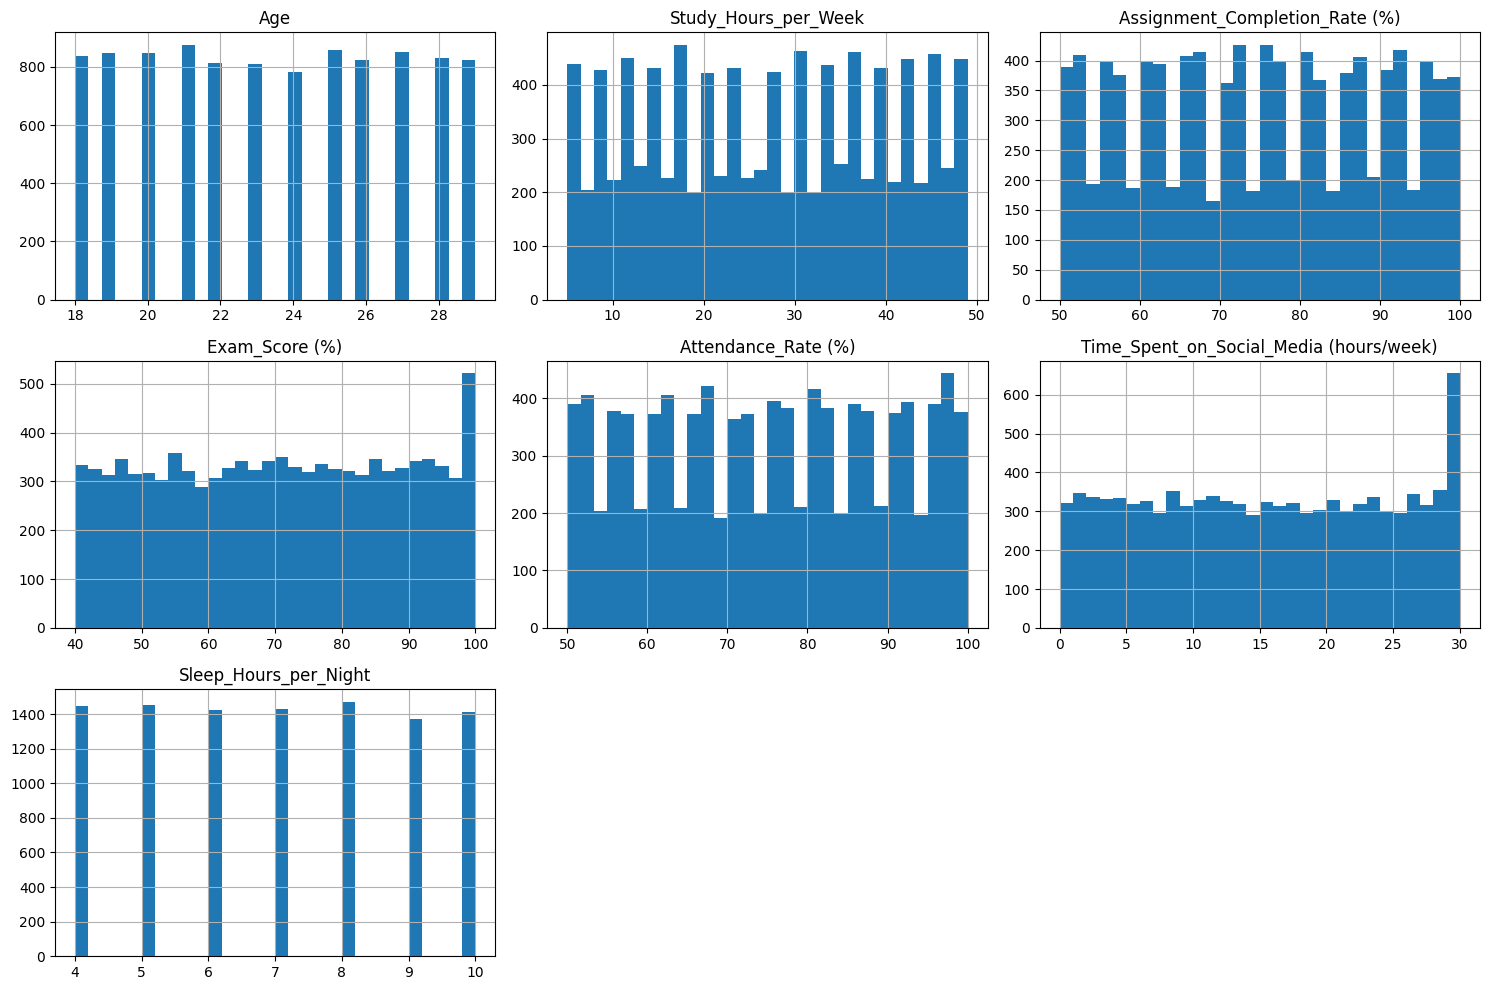

In [212]:
# Гистограммы для числовых признаков
num_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

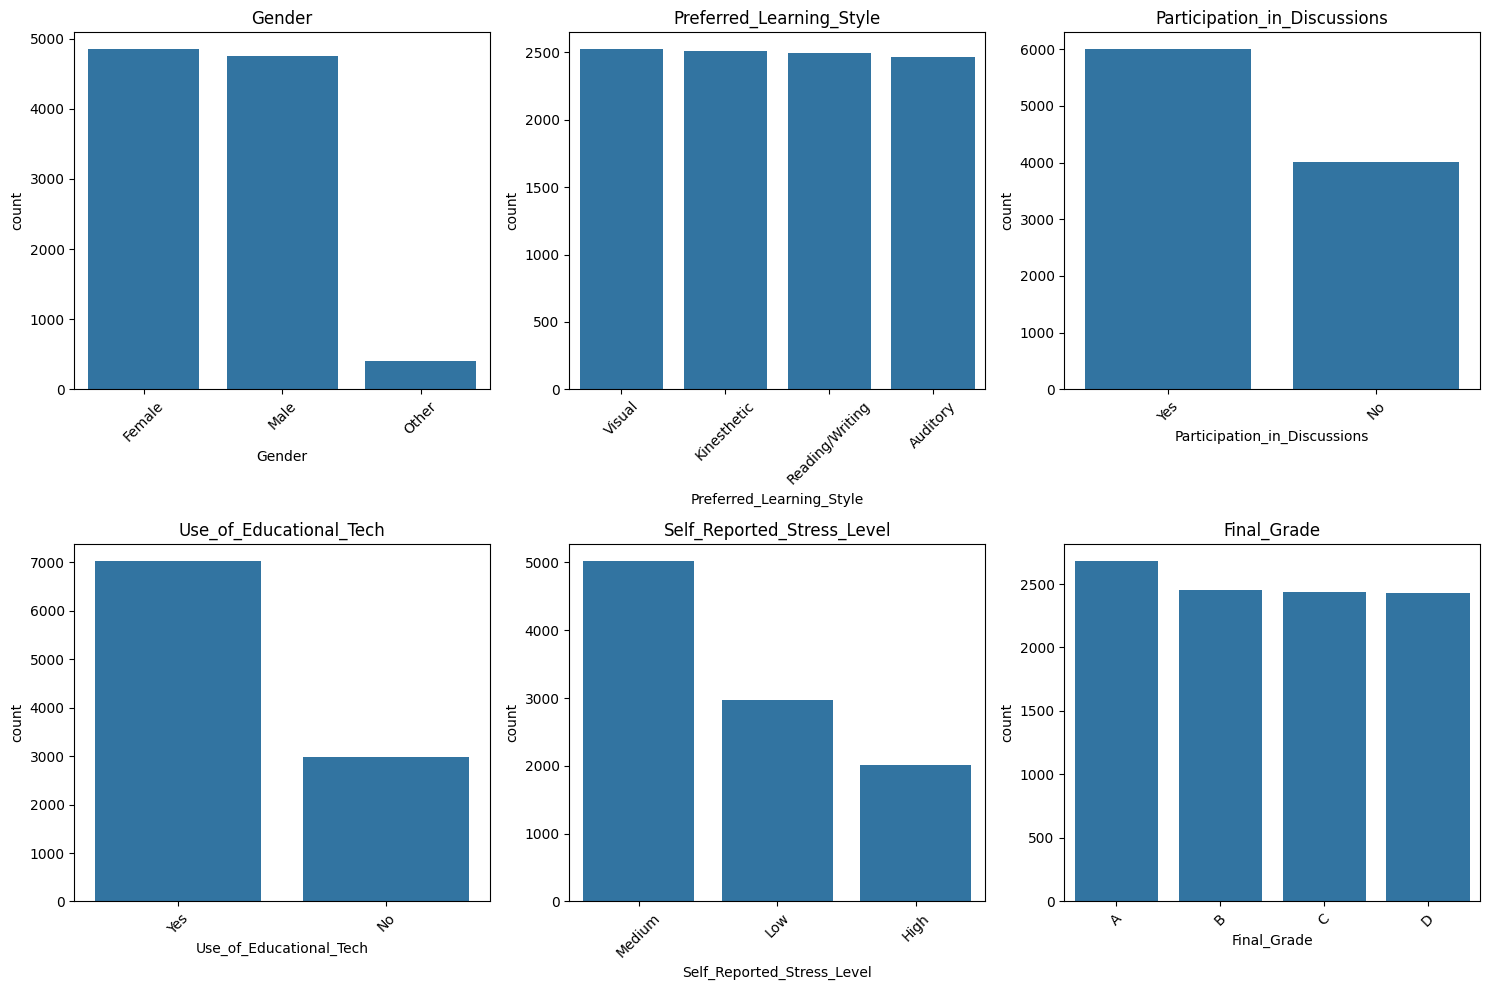

In [213]:
cat_cols = ["Gender", "Preferred_Learning_Style", "Participation_in_Discussions", 
            "Use_of_Educational_Tech", "Self_Reported_Stress_Level", "Final_Grade"]

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

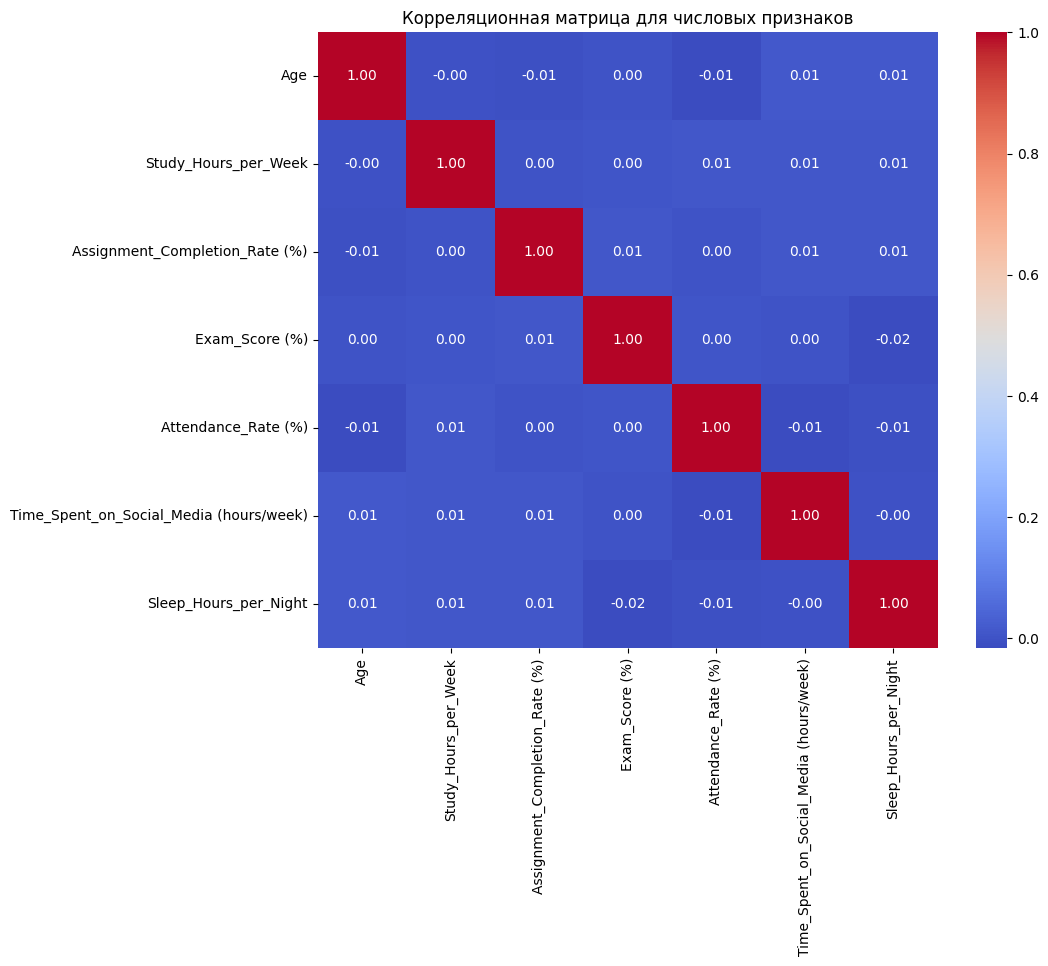

In [214]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица для числовых признаков")
plt.show()

In [215]:
df_model = df.drop(columns=["Student_ID"])
# ordinal encoding
grade_mapping = {"A": 4, "B": 3, "C": 2, "D": 1, "F": 0}
df_model["Final_Grade_Ordinal"] = df_model["Final_Grade"].map(grade_mapping)

X = df_model.drop(columns=["Final_Grade"])
y = df_model["Final_Grade_Ordinal"]

# one-hot encoding
categorical_features = ["Gender", "Preferred_Learning_Style", "Participation_in_Discussions", 
                        "Use_of_Educational_Tech", "Self_Reported_Stress_Level"]

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X.head()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade_Ordinal,Gender_Male,Gender_Other,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
0,18,48,14,100,69,66,9,8,2,False,False,True,False,False,True,True,False,False
1,29,30,20,71,40,57,28,8,1,False,False,False,True,False,False,True,False,True
2,20,47,11,60,43,79,13,7,1,False,False,True,False,False,False,True,True,False
3,23,13,0,63,70,60,24,10,3,False,False,False,False,False,True,True,True,False
4,19,24,19,59,63,93,26,8,2,False,False,False,False,False,True,True,False,True


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [217]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=23),
    "Decision Tree": DecisionTreeClassifier(random_state=23),
    "SVM": SVC(max_iter=1000, random_state=23),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=23),
    "Gradient Boosting": GradientBoostingClassifier(random_state=23)
}

d:\Documents\GitHub\BMSTU-TMO\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: accuracy = 0.999 F1 = 0.9989999913192937
Decision Tree: accuracy = 1.0 F1 = 1.0
SVM: accuracy = 0.995 F1 = 0.9949979614765395
K-Nearest Neighbors: accuracy = 0.9125 F1 = 0.9121997351903586
Random Forest: accuracy = 1.0 F1 = 1.0
Gradient Boosting: accuracy = 1.0 F1 = 1.0


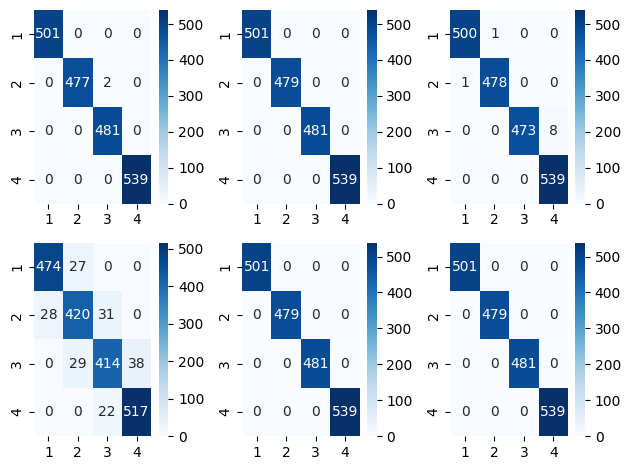

In [219]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

base_results = {}

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    base_results[name] = (accuracy,f1)

    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    print(f"{name}: accuracy = {accuracy} F1 = {f1}")
plt.tight_layout()
plt.show()

In [220]:
from sklearn.model_selection import GridSearchCV
param_grids = {
    "K-Nearest Neighbors": {
        'n_neighbors': range(3, 15),
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

for name in ["K-Nearest Neighbors"]:
    print(f"\n=== Подбор для {name} ===")
    grid_search = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=5,  # 5-fold кросс-валидация
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    print(f"Лучшие параметры: {grid_search.best_params_}")

    # Оценка на тестовых данных
    model = grid_search.best_estimator_
    y_pred = model.predict(X_test)
    print(f"Accuracy на тесте: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}\n")



=== Подбор для K-Nearest Neighbors ===
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 14}
Accuracy на тесте: 0.9700
F1-Score (weighted): 0.9699



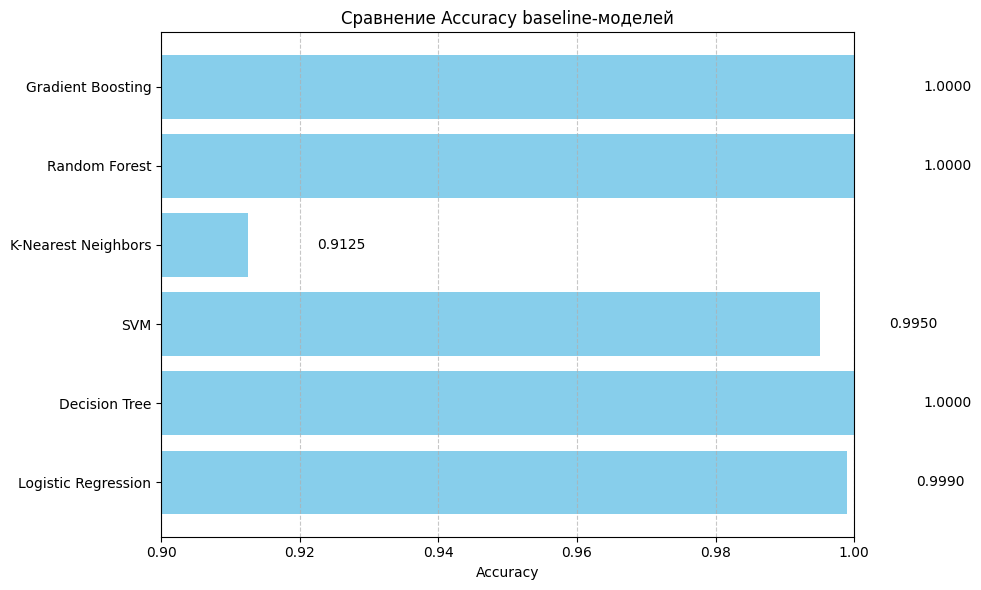

In [221]:
models = list(base_results.keys())
accuracy_values = [result[0] for result in base_results.values()]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Сравнение Accuracy baseline-моделей')
plt.xlim(0.9, 1.0)

for i, acc in enumerate(accuracy_values):
    plt.text(acc + 0.01, i, f"{acc:.4f}", va='center')


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

K-Nearest Neighbors: accuracy = 0.97 F1 = 0.9699099990674303


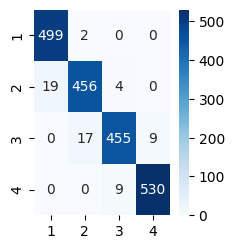

In [222]:
reinforced_models = {
    "K-Nearest Neighbors": KNeighborsClassifier(metric="manhattan",n_neighbors=14),
}

reinforced_results = {}

for i, (name, model) in enumerate(reinforced_models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    reinforced_results[name] = (accuracy,f1)

    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    print(f"{name}: accuracy = {accuracy} F1 = {f1}")
plt.tight_layout()
plt.show()

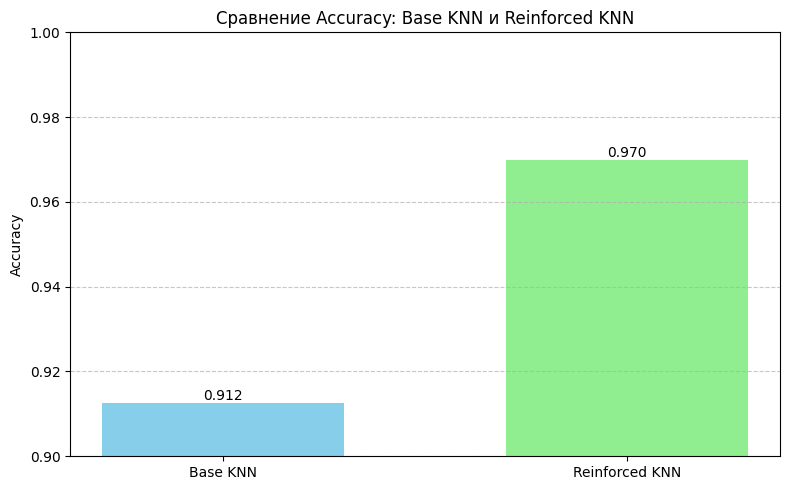

In [227]:
base_accuracy = base_results["K-Nearest Neighbors"][0]  # Accuracy базовой KNN
reinforced_accuracy = reinforced_results["K-Nearest Neighbors"][0]  # Accuracy улучшенной KNN

# Настройка графика
plt.figure(figsize=(8, 5))
models = ['Base KNN', 'Reinforced KNN']
accuracies = [base_accuracy, reinforced_accuracy]
colors = ['skyblue', 'lightgreen']

# Построение столбцов
bars = plt.bar(models, accuracies, color=colors, width=0.6)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Оформление
plt.ylim(0.9, 1)
plt.ylabel('Accuracy')
plt.title('Сравнение Accuracy: Base KNN и Reinforced KNN')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()